# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Documentation on units: https://openweathermap.org/weather-data

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Build container variables for storing weather data
city_name = []
city_cloudiness = []
city_country = []
city_date = []
city_humidity = []
city_lat = []
city_lng = []
city_max_temp = []
city_wind_speed = []

# Store loop counting variables
city_count = 1
set_count = 1

In [4]:
# Use a loop to search for data on every city
for x in cities:
    
    response = requests.get(query_url + x)
    response_json = response.json()
    print(f"Processing Record {city_count} of Set {set_count} | {x}")
    
    if city_count % 50 == 0:
        city_count = 1
        set_count += 1
    else:
        city_count +=1
        
    try:
        city_cloudiness.append(response_json['clouds']['all'])
        city_country.append(response_json['sys']['country'])
        city_date.append(response_json['dt'])
        city_humidity.append(response_json['main']['humidity'])
        city_lat.append(response_json['coord']['lat'])
        city_lng.append(response_json['coord']['lon'])
        city_max_temp.append(response_json['main']['temp_max'])
        city_wind_speed.append(response_json['wind']['speed'])
        city_name.append(x)
    except:
        print("City not found. Skipping...")
        pass

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | yaan
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | lata
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | provideniya
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | saint-francois
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | saku
Processing Record 18 of Set 1 | honiara
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | mecca
Processing Record 21 of Set 1 | elizabeth city
Processing Record 22 of Set 1 | tuktoyaktuk
Processing Record 23 of Set 1 | mataura
Processing Record 24 of 

Processing Record 41 of Set 4 | taoudenni
Processing Record 42 of Set 4 | geraldton
Processing Record 43 of Set 4 | kitaibaraki
Processing Record 44 of Set 4 | da nang
Processing Record 45 of Set 4 | sistranda
Processing Record 46 of Set 4 | vostok
Processing Record 47 of Set 4 | bethel
Processing Record 48 of Set 4 | vao
Processing Record 49 of Set 4 | san cristobal
Processing Record 50 of Set 4 | turukhansk
Processing Record 1 of Set 5 | noumea
Processing Record 2 of Set 5 | minamata
Processing Record 3 of Set 5 | two rivers
Processing Record 4 of Set 5 | muswellbrook
Processing Record 5 of Set 5 | leningradskiy
Processing Record 6 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 5 | camacha
Processing Record 8 of Set 5 | havelock
Processing Record 9 of Set 5 | iquique
Processing Record 10 of Set 5 | pangnirtung
Processing Record 11 of Set 5 | ketchikan
Processing Record 12 of Set 5 | ceyhan
Processing Record 13 of Set 5 | nelson bay
Processing

Processing Record 31 of Set 8 | omsukchan
Processing Record 32 of Set 8 | calama
Processing Record 33 of Set 8 | sabang
Processing Record 34 of Set 8 | nyurba
Processing Record 35 of Set 8 | anito
Processing Record 36 of Set 8 | cabedelo
Processing Record 37 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 38 of Set 8 | taiobeiras
Processing Record 39 of Set 8 | russell
Processing Record 40 of Set 8 | buta
Processing Record 41 of Set 8 | bereda
Processing Record 42 of Set 8 | iwanai
Processing Record 43 of Set 8 | katsuura
Processing Record 44 of Set 8 | wajima
Processing Record 45 of Set 8 | tuatapere
Processing Record 46 of Set 8 | nizhneshilovka
City not found. Skipping...
Processing Record 47 of Set 8 | kitui
Processing Record 48 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 49 of Set 8 | kaili
Processing Record 50 of Set 8 | jujuy
City not found. Skipping...
Processing Record 1 of Set 9 | nemuro
Processing Record 2 of Set 9 | ust-ishim
Processi

Processing Record 18 of Set 12 | canutama
Processing Record 19 of Set 12 | diu
Processing Record 20 of Set 12 | rivadavia
Processing Record 21 of Set 12 | saint-ambroise
Processing Record 22 of Set 12 | burnie
Processing Record 23 of Set 12 | orcopampa
Processing Record 24 of Set 12 | serafimovich
Processing Record 25 of Set 12 | changde
Processing Record 26 of Set 12 | henties bay
Processing Record 27 of Set 12 | xam nua
Processing Record 28 of Set 12 | kudahuvadhoo
Processing Record 29 of Set 12 | namatanai
Processing Record 30 of Set 12 | shache
Processing Record 31 of Set 12 | pafos
Processing Record 32 of Set 12 | puerto del rosario
Processing Record 33 of Set 12 | taldan
Processing Record 34 of Set 12 | sabzevar
Processing Record 35 of Set 12 | santa maria do para
Processing Record 36 of Set 12 | jiangkou
Processing Record 37 of Set 12 | akhmim
Processing Record 38 of Set 12 | tessalit
Processing Record 39 of Set 12 | nizhniy tsasuchey
Processing Record 40 of Set 12 | opunake
Pro

In [5]:
print(len(city_name))
print(len(city_cloudiness))
print(len(city_country))
print(len(city_date))
print(len(city_humidity))
print(len(city_lat))
print(len(city_lng))
print(len(city_max_temp))
print(len(city_wind_speed))


544
544
544
544
544
544
544
544
544


In [6]:
weather_dict = {
    "City": city_name,
    "Cloudiness": city_cloudiness,
    "Country": city_country,
    "Date": city_date,
    "Humidity": city_humidity,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_max_temp,
    "Wind Speed": city_wind_speed
}
weather_data = pd.DataFrame(weather_dict)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Export to csv
weather_data.to_csv("Output/weather_data.csv")

In [8]:
# Print the DataFrame header
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,20,AR,1585761812,66,-54.80,-68.30,53.60,7.11
1,hermanus,2,ZA,1585761812,69,-34.42,19.23,73.00,10.00
2,yaan,35,NG,1585761813,46,7.38,8.57,92.48,5.59
3,hilo,75,US,1585761813,82,19.73,-155.09,66.99,4.70
4,kapaa,75,US,1585761813,94,22.08,-159.32,68.00,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
# Get current time to print in plot titles
time_label = time.strftime("%Y-%m-%d")
#print(time_label)

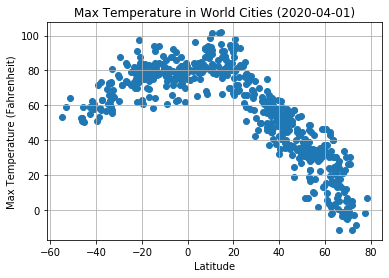

In [10]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_max_temp, marker="o")

# Incorporate the other graph properties
plt.title("Max Temperature in World Cities (" + time_label + ")")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

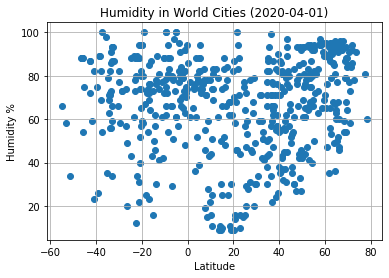

In [11]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_humidity, marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities (" + time_label + ")")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

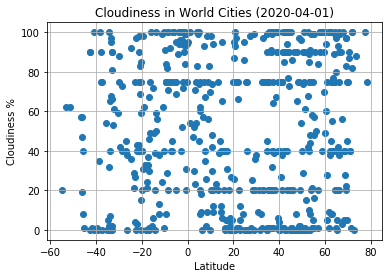

In [12]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_cloudiness, marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities (" + time_label + ")")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

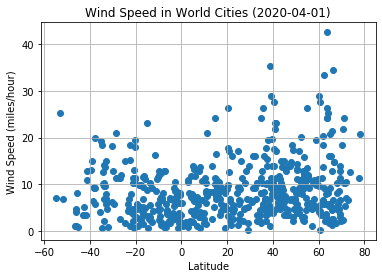

In [13]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_wind_speed, marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities (" + time_label + ")")
plt.ylabel("Wind Speed (miles/hour)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/WindSpeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots


In [15]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression